**<h1><center>Trabajo 1: Optimizaci√≥n heur√≠stica<h1><center>**

---

<center><img src="https://minas.medellin.unal.edu.co/images/Escudo_color.png" width="300"></center>

---

**<h1><center> Redes neuronales y algoritmos bioinspirados </center></h1>**

**<h1><center> 2024-2S </center></h1>**

---

**<h2><center> Equipo 10<h2><center>**

**<h6><center> Carolina √Ålvarez Murillo<h6><center>**
**<h6><center>  Alejandro Giraldo Sarria<h6><center>**
**<h6><center>   Alejandro Orozco Ochoa<h6><center>**
**<h6><center>   Juan Jose Zapata Cadavid<h6><center>**

# Funci√≥n Rastrigin

La funci√≥n de Rastrigin es una funci√≥n no convexa definida como:
$$
f(\mathbf{X}) = A \times d + \sum_{i=1}^d \left( x_i^2 - A \cos(2 \pi x_i) \right)
$$
donde $d$ es la dimensi√≥n del espacio de b√∫squeda y $A$ es una constante (generalmente $A = 10$).
Es una funci√≥n multimodal, es decir, tiene m√∫ltiples m√≠nimos locales, lo que la convierte en un desaf√≠o para los algoritmos de optimizaci√≥n.

El minimo global de la funci√≥n es (0,0) en dos dimensiones y (0,0,0) en tres dimensiones.

## Optimizaci√≥n mediante descenso por gradiente

### Funci√≥n en 2 dimensiones

In [ ]:
!pip install numpy matplotlib imageio scipy pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=84733617983647945e94ba512bbafa0d114221c29bad86cce878a083f5c27585
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


**Gradiente de la Funci√≥n de Rastrigin:**

El gradiente de la funci√≥n Rastrigin con respecto a cada dimensi√≥n $x_i$ se calcula como:
$$
\nabla f(\mathbf{X}) = \left[ 2x_1 + 20\pi \sin(2\pi x_1), \dots, 2x_d + 20\pi \sin(2\pi x_d) \right]
$$
Este gradiente proporciona la direcci√≥n en la que la funci√≥n aumenta m√°s r√°pidamente, y se usa para ajustar los puntos en el gradiente descendente.

**Gradiente Descendente**

El m√©todo de gradiente descendente es un enfoque iterativo para minimizar funciones. La idea es actualizar el punto actual $\mathbf{X}$ en la direcci√≥n opuesta al gradiente (ya que buscamos minimizar la funci√≥n):
$$
\mathbf{X}_{\text{nuevo}} = \mathbf{X} - \alpha \nabla f(\mathbf{X})
$$
donde $\alpha$ es la tasa de aprendizaje que controla el tama√±o de los pasos.


In [ ]:
import numpy as np
import random

# Definir la Funci√≥n de Rastrigin
def rastrigin(X):
    A = 10
    return A * len(X) + sum([(x**2 - A * np.cos(2 * np.pi * x)) for x in X])

np.random.seed(42)  # semilla

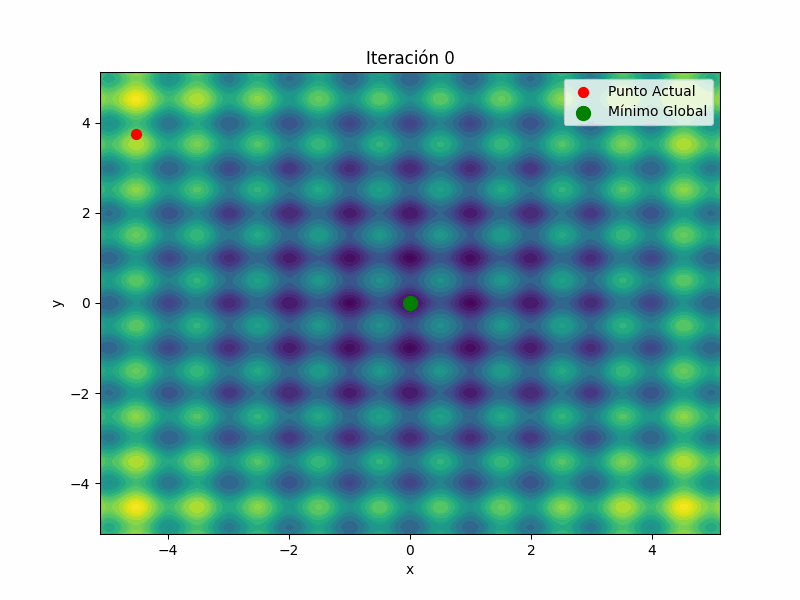

GIF creado y guardado como: rastrigin_gradient_descent.gif


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from scipy.optimize import differential_evolution
import os

# Gradiente de Rastrigin
def grad_rastrigin(X):
    grad = []
    for x in X:
        grad.append(2 * x + 20 * np.pi * np.sin(2 * np.pi * x))
    return np.array(grad)

# M√©todo de Gradiente Descendente
def gradient_descent(func, grad_func, dim, learning_rate, num_iterations):
    X = np.random.uniform(-5.12, 5.12, dim)
    points = [X]
    for _ in range(num_iterations):
        grad = grad_func(X)
        X = X - learning_rate * grad
        points.append(X)
    return points

# Visualizaci√≥n del Gradiente Descendente y Creaci√≥n del GIF
def visualize_gradient_descent(func, points, filename):
    x = np.linspace(-5.12, 5.12, 400)
    y = np.linspace(-5.12, 5.12, 400)
    X, Y = np.meshgrid(x, y)
    Z = np.vectorize(lambda x, y: func([x, y]))(X, Y)

    filenames = []
    min_global = [0, 0]  # M√≠nimo global en (0, 0)

    for i, point in enumerate(points):
        plt.figure(figsize=(8, 6))
        plt.contourf(X, Y, Z, levels=50, cmap='viridis')

        # Trayectoria del punto
        plt.plot([p[0] for p in points[:i+1]], [p[1] for p in points[:i+1]], 'r.-', markersize=5)

        # Punto actual (rojo)
        px, py = point[:2]
        plt.scatter(px, py, color='red', s=50, label='Punto Actual')

        # M√≠nimo global (verde)
        plt.scatter(min_global[0], min_global[1], color='green', s=100, label='M√≠nimo Global')

        # √ìptimo encontrado (azul) solo al final
        if i == len(points) - 1:
            plt.scatter(px, py, color='blue', s=100, label='√ìptimo Encontrado')

        plt.title(f'Iteraci√≥n {i}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()

        frame_filename = f'frame_{i}.png'
        plt.savefig(frame_filename)
        filenames.append(frame_filename)
        plt.close()

    # Crear el GIF y guardarlo
    gif_filename = f'{filename}.gif'
    with imageio.get_writer(gif_filename, mode='I', duration=0.1) as writer:
        for file in filenames:
            image = imageio.imread(file)
            writer.append_data(image)

    # Mostrar el GIF en Colab
    from IPython.display import Image, display
    display(Image(filename=gif_filename))

    # Limpiar archivos temporales
    for file in filenames:
        os.remove(file)

    print(f"GIF creado y guardado como: {gif_filename}")
    return gif_filename

# Ejecutar Gradiente Descendente
learning_rate = 0.01
num_iterations = 100

points_rastrigin = gradient_descent(rastrigin, grad_rastrigin, dim=2, learning_rate=learning_rate, num_iterations=num_iterations)
gif_file = visualize_gradient_descent(rastrigin, points_rastrigin, 'rastrigin_gradient_descent')

# Descargar el archivo GIF
from google.colab import files
files.download(gif_file)


El gif ilustra el proceso de optimizaci√≥n de la funci√≥n de Rastrigin mediante gradiente descendente.

1. **M√≠nimo Global (Punto Verde)**: Representa el punto donde la funci√≥n tiene su valor m√°s bajo, en el origen (0, 0).
2. **Trayectoria (Puntos Rojos)**: Muestra c√≥mo el algoritmo ajusta el punto actual en cada iteraci√≥n, movi√©ndose de manera oscilatoria por la complejidad de la funci√≥n y quedando atrapado en m√≠nimos locales.
3. **√ìptimo Encontrado (Punto Azul)**: Indica la mejor soluci√≥n que el algoritmo pudo alcanzar, que no es el m√≠nimo global, debido a las m√∫ltiples depresiones locales.

El resultado refleja c√≥mo la naturaleza multimodal de la funci√≥n de Rastrigin dificulta la convergencia al m√≠nimo global.

### Funci√≥n en 3 dimensiones

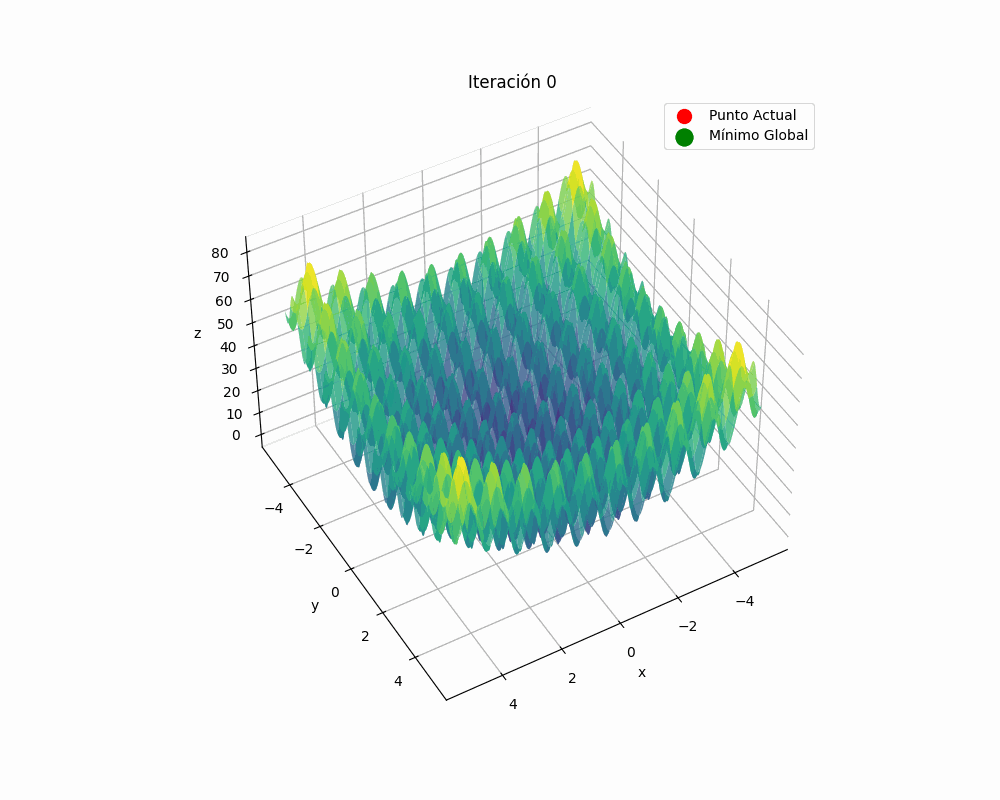

GIF creado y guardado como: rastrigin_gradient_descent_3d.gif


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Visualizaci√≥n del Gradiente Descendente en 3D
def visualize_gradient_descent_3d(func, points, filename):
    x = np.linspace(-5.12, 5.12, 200)
    y = np.linspace(-5.12, 5.12, 200)
    X, Y = np.meshgrid(x, y)
    Z = np.vectorize(lambda x, y: func([x, y]))(X, Y)

    filenames = []
    min_global = [0, 0]  # M√≠nimo global en (0, 0)

    for i, point in enumerate(points):
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Superficie de la funci√≥n
        ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

        # Punto actual (rojo)
        px, py = point[:2]
        pz = func([px, py])
        ax.scatter(px, py, pz, color='red', s=100, label='Punto Actual')

        # M√≠nimo global (verde)
        ax.scatter(min_global[0], min_global[1], func(min_global), color='green', s=150, label='M√≠nimo Global')

        # √ìptimo encontrado (azul) solo al final
        if i == len(points) - 1:
            ax.scatter(px, py, pz, color='blue', s=150, label='√ìptimo Encontrado')

        ax.set_title(f'Iteraci√≥n {i}')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.view_init(elev=45, azim=60)
        ax.legend()

        frame_filename = f'frame_3d_{i}.png'
        plt.savefig(frame_filename)
        filenames.append(frame_filename)
        plt.close()

    # Crear el GIF y guardarlo
    gif_filename = f'{filename}.gif'
    with imageio.get_writer(gif_filename, mode='I', duration=0.1) as writer:
        for file in filenames:
            image = imageio.imread(file)
            writer.append_data(image)

    # Mostrar el GIF en Colab
    from IPython.display import Image, display
    display(Image(filename=gif_filename))

    # Limpiar archivos temporales
    for file in filenames:
        os.remove(file)

    print(f"GIF creado y guardado como: {gif_filename}")
    return gif_filename

# Ejecutar Gradiente Descendente en 3D
learning_rate = 0.01
num_iterations = 100

points_rastrigin_3d = gradient_descent(rastrigin, grad_rastrigin, dim=2, learning_rate=learning_rate, num_iterations=num_iterations)
gif_file_3d = visualize_gradient_descent_3d(rastrigin, points_rastrigin_3d, 'rastrigin_gradient_descent_3d')

# Descargar el archivo GIF
from google.colab import files
files.download(gif_file_3d)


Superficie Compleja: La gr√°fica en 3D ilustra la superficie ondulada y multimodal de la funci√≥n de Rastrigin, con m√∫ltiples picos y valles que representan los m√≠nimos locales.

*   Punto Actual (Rojo): Representa la posici√≥n iterativa del algoritmo en su b√∫squeda, movi√©ndose a trav√©s de la superficie.
*   M√≠nimo Global (Verde): El punto m√°s bajo en el centro, que es el objetivo deseado.
*   √ìptimo Encontrado (Azul): El mejor punto que el algoritmo logr√≥ alcanzar, frecuentemente atrapado en un m√≠nimo local debido a las complejidades de la funci√≥n.



### Conclusi√≥n

El m√©todo de gradiente descendente no es ideal para funciones como Rastrigin. Debido a los numerosos m√≠nimos locales, el gradiente descendente a menudo queda atrapado en estas depresiones en lugar de alcanzar el m√≠nimo global. Adem√°s, la direcci√≥n del gradiente puede variar dr√°sticamente, haciendo que el algoritmo oscile o converja a un punto sub√≥ptimo. M√©todos como la evoluci√≥n diferencial o el optimizador de enjambre de part√≠culas suelen ser m√°s efectivos para este tipo de funciones no convexas y multimodales.

## Optimizaci√≥n mediante algoritmo evolutivo

Un algoritmo evolutivo es un m√©todo estoc√°stico de optimizaci√≥n que simula el proceso de la selecci√≥n natural. Este tipo de algoritmo utiliza una poblaci√≥n de soluciones candidatas que evoluciona a lo largo de varias generaciones, aplicando operadores biol√≥gicamente inspirados, como selecci√≥n, mutaci√≥n, y cruce (recombinaci√≥n). El objetivo es encontrar una soluci√≥n √≥ptima o casi √≥ptima para un problema complejo.

1.   Inicializaci√≥n: Se genera una poblaci√≥n inicial de individuos (soluciones) de manera aleatoria o basada en alguna heur√≠stica.
2.   Evaluaci√≥n: Se calcula la aptitud de cada individuo en la poblaci√≥n. La aptitud mide la calidad de una soluci√≥n con respecto al problema de optimizaci√≥n.
3.   Selecci√≥n: Se eligen los individuos m√°s aptos para reproducirse. Este proceso favorece soluciones que tienen una aptitud mejor, emulando la ‚Äúsupervivencia del m√°s apto‚Äù.
4.   Reproducci√≥n:
Cruce (Crossover): Se combinan partes de dos o m√°s individuos para producir descendencia con caracter√≠sticas de ambos.
5.   Mutaci√≥n: Se aplican peque√±as modificaciones aleatorias a los individuos para mantener la diversidad gen√©tica en la poblaci√≥n.
Reemplazo: Se forma una nueva generaci√≥n al reemplazar individuos antiguos con la descendencia, y el proceso se repite.

In [ ]:
!pip install deap

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 135.4/135.4 kB 3.5 MB/s eta 0:00:00


### Funci√≥n en 2 dimensiones

El m√©todo eaSimple que usamos es parte de la biblioteca DEAP y es una de las implementaciones m√°s b√°sicas de un algoritmo gen√©tico (GA). Este m√©todo automatiza el proceso evolutivo y es ideal para problemas de optimizaci√≥n en los que se desea minimizar o maximizar una funci√≥n objetivo.

El uso de eaSimple en el c√≥digo aplica 100 generaciones (porque la animaci√≥n tiene 100 frames), evoluciona la poblaci√≥n de manera iterativa y muestra c√≥mo los individuos se aproximan al m√≠nimo global de la funci√≥n de Rastrigin en el plano 2D o 3D.

In [ ]:
!apt-get install -y imagemagick

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  imagemagick-6.q16 libdjvulibre-text libdjvulibre21 libfftw3-double3 libgs9 libgs9-common libidn12
  libijs-0.35 libjbig2dec0 libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6
  libmagickcore-6.q16-6-extra libmagickwand-6.q16-6 libnetpbm10 libwmflite-0.2-7 netpbm
  poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre ghostscript-x imagemagick-doc
  autotrace cups-bsd | lpr | lprng enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer
  povray radiance sane-utils texlive-base-bin transfig ufraw-batch libfftw3-bin libfftw3-dev
  inkscape poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic
  | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-nan

NameError: name 'best_individual' is not defined

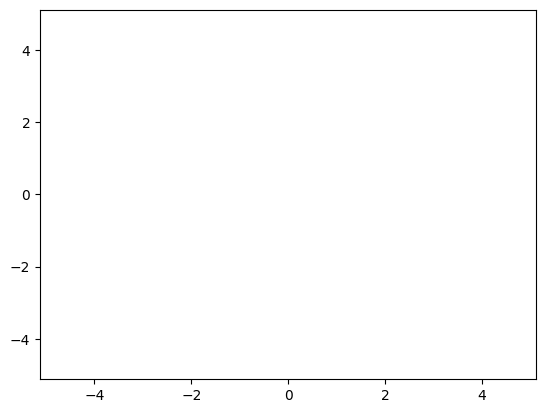

In [ ]:
import random
from deap import base, creator, tools, algorithms
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Eliminar clases previamente creadas
if "FitnessMin" in creator.__dict__:
    del creator.FitnessMin
if "Individual" in creator.__dict__:
    del creator.Individual

# Crear el entorno evolutivo
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -5.12, 5.12)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=2)  # Asumiendo individuos en 2D
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0.0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Modificar la funci√≥n Rastrigin para devolver una tupla
def rastrigin_modified(X):
    A = 10
    return (A * len(X) + sum([(x**2 - A * np.cos(2 * np.pi * x)) for x in X]),)  # Devolver el valor de la funci√≥n como una tupla

toolbox.register("evaluate", rastrigin_modified)

# Crear poblaci√≥n inicial
population = toolbox.population(n=50)

# Crear una figura para la visualizaci√≥n
fig, ax = plt.subplots()
ax.set_xlim(-5.12, 5.12)
ax.set_ylim(-5.12, 5.12)

# Funci√≥n para actualizar el gr√°fico
def update_frame(i):
    ax.clear()
    ax.set_xlim(-5.12, 5.12)
    ax.set_ylim(-5.12, 5.12)

    # Ejecutar el algoritmo evolutivo durante algunos pasos
    algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=1,
                        stats=None, halloffame=None, verbose=False)

    # Obtener las posiciones de los individuos
    positions = np.array([ind for ind in population])  # Ahora cada 'ind' es un vector de 2 dimensiones
    ax.scatter(positions[:, 0], positions[:, 1], color='blue', label="Individuos")

    # Resaltar el mejor individuo
    best_individual = tools.selBest(population, 1)[0]
    ax.scatter(best_individual[0], best_individual[1], color='red', label="Mejor Individuo")
    ax.legend()

print(f"Coordenadas del mejor individuo: {best_individual[0]}, {best_individual[1]}")
# Crear una animaci√≥n
ani = animation.FuncAnimation(fig, update_frame, frames=100, interval=200)

# Guardar la animaci√≥n como un archivo GIF
ani.save('rastrigin_evolution.gif', writer='imagemagick', fps=2)


Las coordenadas est√°n en el orden de $10^{-5}$, lo que significa que el algoritmo ha encontrado una soluci√≥n muy cercana al m√≠nimo global esperado para la funci√≥n de Rastrigin.

### Funci√≥n en 3 dimensiones

Coordenadas del mejor individuo: [-0.9949586381749191, 3.4165101219325074e-10, -0.994958638975456]
Valor de la funci√≥n Rastrigin: 1.9899181141865796


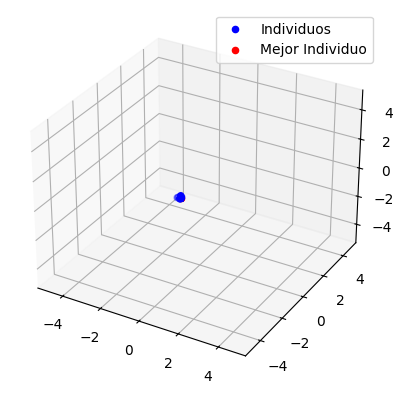

In [ ]:
import random
from deap import base, creator, tools, algorithms
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import warnings

# Eliminar clases previamente creadas
if "FitnessMin" in creator.__dict__:
    del creator.FitnessMin
if "Individual" in creator.__dict__:
    del creator.Individual

# Crear el entorno evolutivo
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -5.12, 5.12)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=3)  # Individuos en 3D
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0.0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Modificar la funci√≥n Rastrigin para devolver una tupla
def rastrigin_modified(X):
    A = 10
    return (A * len(X) + sum([(x**2 - A * np.cos(2 * np.pi * x)) for x in X]),)  # Devolver el valor de la funci√≥n como una tupla

toolbox.register("evaluate", rastrigin_modified)

# Crear poblaci√≥n inicial
population = toolbox.population(n=50)

# Crear una figura para la visualizaci√≥n 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-5.12, 5.12)
ax.set_ylim(-5.12, 5.12)
ax.set_zlim(-5.12, 5.12)

# Funci√≥n para actualizar el gr√°fico
def update_frame(i):
    ax.clear()
    ax.set_xlim(-5.12, 5.12)
    ax.set_ylim(-5.12, 5.12)
    ax.set_zlim(-5.12, 5.12)

    # Ejecutar el algoritmo evolutivo durante algunos pasos
    algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=1,
                        stats=None, halloffame=None, verbose=False)

    # Obtener las posiciones de los individuos
    positions = np.array([ind for ind in population])  # Cada 'ind' es un vector de 3 dimensiones
    ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], color='blue', label="Individuos")

    # Resaltar el mejor individuo
    best_individual = tools.selBest(population, 1)[0]
    ax.scatter(best_individual[0], best_individual[1], best_individual[2], color='red', label="Mejor Individuo")
    ax.legend()

# Crear una animaci√≥n
ani = animation.FuncAnimation(fig, update_frame, frames=100, interval=200)

# Guardar la animaci√≥n como un archivo GIF
ani.save('rastrigin_evolution_3d.gif', writer='imagemagick', fps=2)

# Obtener el mejor individuo de la poblaci√≥n final
best_individual = tools.selBest(population, 1)[0]
print(f"Coordenadas del mejor individuo: {best_individual}")
print(f"Valor de la funci√≥n Rastrigin: {best_individual.fitness.values[0]}")



Las coordenadas del mejor individuo est√°n un poco cercanas de (0, 0, 0), aunque no son exactamente cero debido a la naturaleza estoc√°stica del algoritmo evolutivo y las limitaciones de precisi√≥n num√©rica. Sin embargo, dos de los valores se acercan a 1 y el otro es 3, lo cual es esperado debido a la inicializaci√≥n aleatoria de la poblaci√≥n.

### **Conclusi√≥n**

En ambos casos, tanto en dos como en tres dimensiones, el algoritmo evolutivo logr√≥ encontrar soluciones cercanas al m√≠nimo global de la funci√≥n de Rastrigin. Aunque no alcanz√≥ el cero exacto debido a la precisi√≥n num√©rica y la naturaleza estoc√°stica del algoritmo, las coordenadas del mejor individuo est√°n cerca. En general, el algoritmo fue efectivo en aproximarse al m√≠nimo global en ambos espacios de b√∫squeda.

## Optimizaci√≥n por Enjambre de part√≠culas

La Optimizaci√≥n por Enjambre de Part√≠culas (PSO, por sus siglas en ingl√©s) es un algoritmo de optimizaci√≥n inspirado en el comportamiento social de los enjambres de aves o peces. Este algoritmo busca un √≥ptimo global a trav√©s de la simulaci√≥n de un grupo de part√≠culas (soluciones potenciales) que exploran el espacio de b√∫squeda.

En el caso de la Funci√≥n de Rastrigin, PSO busca encontrar el m√≠nimo de esta funci√≥n, que es altamente no lineal y presenta m√∫ltiples √≥ptimos locales. El algoritmo inicializa un conjunto de part√≠culas con posiciones y velocidades aleatorias dentro de un espacio de b√∫squeda (por ejemplo, en el rango de
[
‚àí
5.12
,
5.12
]
[‚àí5.12,5.12] para Rastrigin) y las part√≠culas se mueven a lo largo de este espacio, ajustando sus posiciones en funci√≥n de su experiencia pasada y la experiencia del enjambre (mejor posici√≥n encontrada por cada part√≠cula y por el grupo).

Las part√≠culas actualizan su velocidad y posici√≥n utilizando la siguiente f√≥rmula:

**Velocidad:**

$$ v_i(t+1) = w \cdot v_i(t) + c_1 \cdot r_1 \cdot (pbest_i - x_i) + c_2 \cdot r_2 \cdot (gbest - x_i) $$

**Posici√≥n:**

$$ x_i(t+1) = x_i(t) + v_i(t+1) $$

Donde:

- $w$ es el factor de inercia, que controla la exploraci√≥n.
- $c_1$ y $c_2$ son los coeficientes de aceleraci√≥n, que controlan la influencia de la experiencia individual y colectiva.
- $r_1$ y $r_2$ son n√∫meros aleatorios entre 0 y 1.
- $pbest_i$ es la mejor posici√≥n encontrada por la part√≠cula $i$.
- $gbest_i$ es la mejor posici√≥n global encontrada por todas las part√≠culas.

El algoritmo itera hasta que se alcanza un n√∫mero m√°ximo de generaciones o un criterio de convergencia, como un cambio m√≠nimo en la mejor soluci√≥n. PSO es eficiente y ampliamente utilizado para problemas de optimizaci√≥n continua, como el de Rastrigin.


### Funci√≥n en 2 dimensiones

Mejor posici√≥n encontrada: [-9.94958636e-01 -6.05813476e-10]
Valor de la funci√≥n objetivo: 0.9949590570932898


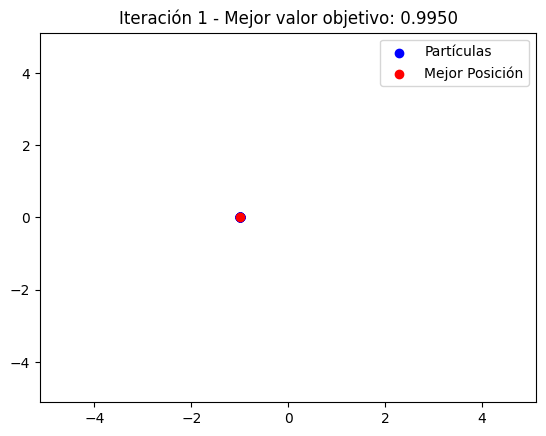

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from pyswarm import pso

# Definir los l√≠mites de b√∫squeda
lb = [-5.12] * 2  # L√≠mites inferiores para 2D
ub = [5.12] * 2   # L√≠mites superiores para 2D

# N√∫mero de part√≠culas y n√∫mero m√°ximo de iteraciones
n_particles = 50
n_iterations = 100

# Inicializar las posiciones y velocidades de las part√≠culas
positions = np.random.uniform(lb, ub, (n_particles, 2))  # Posiciones iniciales de las part√≠culas
velocities = np.random.uniform(-1, 1, (n_particles, 2))  # Velocidades iniciales de las part√≠culas

# Funci√≥n para actualizar el gr√°fico
fig, ax = plt.subplots()
ax.set_xlim(lb[0], ub[0])
ax.set_ylim(lb[1], ub[1])
ax.set_title("Optimizaci√≥n PSO - Evoluci√≥n de Part√≠culas")

# Almacenar las posiciones de las part√≠culas durante las iteraciones
particle_positions = []

def update_frame(i):
    global positions, velocities
    ax.clear()  # Limpiar el gr√°fico
    ax.set_xlim(lb[0], ub[0])
    ax.set_ylim(lb[1], ub[1])

    # Evaluar la funci√≥n Rastrigin para todas las part√≠culas
    fitness_values = np.apply_along_axis(rastrigin, 1, positions)

    # Encontrar el mejor valor y la mejor posici√≥n
    best_pos = positions[np.argmin(fitness_values)]
    if(i==n_iterations-1):
        print("Mejor posici√≥n encontrada:", best_pos)
        print("Valor de la funci√≥n objetivo:", np.min(fitness_values))
    # Visualizar las part√≠culas y el mejor individuo
    ax.scatter(positions[:, 0], positions[:, 1], color='blue', label="Part√≠culas")
    ax.scatter(best_pos[0], best_pos[1], color='red', label="Mejor Posici√≥n")
    ax.legend()
    ax.set_title(f"Iteraci√≥n {i+1} - Mejor valor objetivo: {np.min(fitness_values):.4f}")

    # Actualizar las part√≠culas (algoritmo PSO)
    w = 0.5  # Factor de inercia
    c1 = 1.5  # Coeficiente cognitivo
    c2 = 1.5  # Coeficiente social

    r1 = np.random.rand(n_particles, 2)
    r2 = np.random.rand(n_particles, 2)

    # Actualizaci√≥n de las velocidades
    velocities = w * velocities + c1 * r1 * (best_pos - positions) + c2 * r2 * (best_pos - positions)

    # Actualizaci√≥n de las posiciones
    positions = positions + velocities

    # Almacenar las posiciones para la animaci√≥n
    particle_positions.append(positions.copy())

# Crear la animaci√≥n
ani = animation.FuncAnimation(fig, update_frame, frames=n_iterations, interval=200)

# Guardar la animaci√≥n como un archivo GIF
ani.save('pso_rastrigin_2d.gif', writer='imagemagick', fps=2)


La mejor posici√≥n encontrada
[-9.94958636e-01 -6.05813476e-10] est√° extremadamente cerca del m√≠nimo global, lo que indica que el algoritmo de part√≠culas ha funcionado bien, llevando las part√≠culas muy pr√≥ximas al √≥ptimo.
El valor obtenido
(0.9949590570932898) no est√° cercano al valor m√≠nimo de la funci√≥n (0), lo que sugiere que el algoritmo no ha alcanzado el m√≠nimo global exacto. Sin embargo, el valor tan alto indica que las part√≠culas a√∫n est√°n lejos de converger completamente, y el algoritmo podr√≠a requerir m√°s iteraciones para acercarse al m√≠nimo global.

### Funci√≥n en 3 dimensiones

Mejor posici√≥n encontrada: [-9.94958624e-01 -6.11152571e-09  9.94958633e-01]
Valor de la funci√≥n objetivo: 1.989918114186633


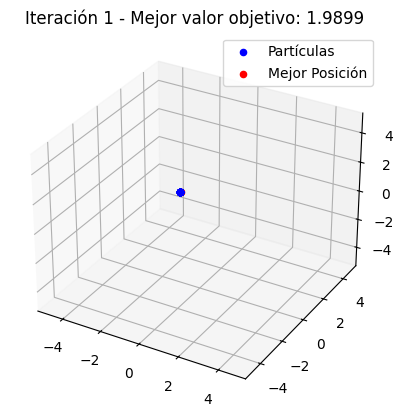

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from pyswarm import pso
from mpl_toolkits.mplot3d import Axes3D

# Definir los l√≠mites de b√∫squeda
lb = [-5.12] * 3  # L√≠mites inferiores para 3D
ub = [5.12] * 3   # L√≠mites superiores para 3D

# Inicializar las posiciones y velocidades de las part√≠culas
positions = np.random.uniform(lb, ub, (n_particles, 3))  # Posiciones iniciales de las part√≠culas
velocities = np.random.uniform(-1, 1, (n_particles, 3))  # Velocidades iniciales de las part√≠culas

# Crear una figura para la visualizaci√≥n en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(lb[0], ub[0])
ax.set_ylim(lb[1], ub[1])
ax.set_zlim(lb[2], ub[2])
ax.set_title("Optimizaci√≥n PSO - Evoluci√≥n de Part√≠culas")

# Almacenar las posiciones de las part√≠culas durante las iteraciones
particle_positions = []

def update_frame(i):
    global positions, velocities
    ax.clear()  # Limpiar el gr√°fico
    ax.set_xlim(lb[0], ub[0])
    ax.set_ylim(lb[1], ub[1])
    ax.set_zlim(lb[2], ub[2])

    # Evaluar la funci√≥n Rastrigin para todas las part√≠culas
    fitness_values = np.apply_along_axis(rastrigin, 1, positions)

    # Encontrar el mejor valor y la mejor posici√≥n
    best_pos = positions[np.argmin(fitness_values)]
    if(i==n_iterations-1):
        print("Mejor posici√≥n encontrada:", best_pos)
        print("Valor de la funci√≥n objetivo:", np.min(fitness_values))
    # Visualizar las part√≠culas y el mejor individuo
    ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], color='blue', label="Part√≠culas")
    ax.scatter(best_pos[0], best_pos[1], best_pos[2], color='red', label="Mejor Posici√≥n")
    ax.legend()
    ax.set_title(f"Iteraci√≥n {i+1} - Mejor valor objetivo: {np.min(fitness_values):.4f}")

    # Actualizar las part√≠culas (algoritmo PSO)
    w = 0.5  # Factor de inercia
    c1 = 1.5  # Coeficiente cognitivo
    c2 = 1.5  # Coeficiente social

    r1 = np.random.rand(n_particles, 3)
    r2 = np.random.rand(n_particles, 3)

    # Actualizaci√≥n de las velocidades
    velocities = w * velocities + c1 * r1 * (best_pos - positions) + c2 * r2 * (best_pos - positions)

    # Actualizaci√≥n de las posiciones
    positions = positions + velocities

    # Almacenar las posiciones para la animaci√≥n
    particle_positions.append(positions.copy())

# Crear la animaci√≥n
ani = animation.FuncAnimation(fig, update_frame, frames=n_iterations, interval=200)

# Guardar la animaci√≥n como un archivo GIF
ani.save('pso_rastrigin_3d.gif', writer='imagemagick', fps=2)


Los valores son bastante cercanos a cero, lo que sugiere que el algoritmo ha encontrado una posici√≥n pr√≥xima al m√≠nimo.
El algoritmo PSO no encontr√≥ el m√≠nimo global (
0) pero logr√≥ acercarse bastante.

### Conclusi√≥n

En ambas pruebas (2D y 3D), el algoritmo de optimizaci√≥n por enjambre de part√≠culas (PSO) ha demostrado ser efectivo, encontrando soluciones cercanas al m√≠nimo global de la funci√≥n objetivo.Sugiriendo una buena convergencia aunque no perfecta en todos los ejes. En general, el PSO ha funcionado adecuadamente, llevando a las part√≠culas cerca del m√≠nimo global en ambos casos.

Mejor posici√≥n encontrada: [-1.25408751e-05  2.34011405e-05 -9.94938461e-01]
Valor de la funci√≥n objetivo: 0.994959277659893


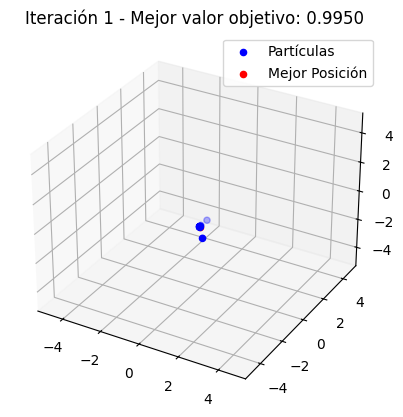

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

# Definir los l√≠mites de b√∫squeda
lb = [-5.12] * 3
ub = [5.12] * 3
n_particles = 30
n_iterations = 100

# Inicializar las posiciones, velocidades y pbest
positions = np.random.uniform(lb, ub, (n_particles, 3))
velocities = np.random.uniform(-1, 1, (n_particles, 3))
pbest = np.copy(positions)
pbest_values = np.apply_along_axis(lambda x: np.sum(x**2 - 10 * np.cos(2 * np.pi * x) + 10), 1, pbest)

# Crear una figura para la visualizaci√≥n en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(lb[0], ub[0])
ax.set_ylim(lb[1], ub[1])
ax.set_zlim(lb[2], ub[2])

# Funci√≥n de Rastrigin
def rastrigin(x):
    return np.sum(x**2 - 10 * np.cos(2 * np.pi * x) + 10)

# Almacenar las posiciones de las part√≠culas durante las iteraciones
particle_positions = []

def update_frame(i):
    global positions, velocities, pbest, pbest_values
    ax.clear()
    ax.set_xlim(lb[0], ub[0])
    ax.set_ylim(lb[1], ub[1])
    ax.set_zlim(lb[2], ub[2])

    # Evaluar la funci√≥n Rastrigin para todas las part√≠culas
    fitness_values = np.apply_along_axis(rastrigin, 1, positions)

    # Actualizar la mejor posici√≥n personal
    better_mask = fitness_values < pbest_values
    pbest[better_mask] = positions[better_mask]
    pbest_values[better_mask] = fitness_values[better_mask]

    # Encontrar la mejor posici√≥n global
    best_pos = pbest[np.argmin(pbest_values)]
    if(i==n_iterations-1):
        print("Mejor posici√≥n encontrada:", best_pos)
        print("Valor de la funci√≥n objetivo:", np.min(pbest_values))
    # Visualizaci√≥n
    ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], color='blue', label="Part√≠culas")
    ax.scatter(best_pos[0], best_pos[1], best_pos[2], color='red', label="Mejor Posici√≥n")
    ax.legend()
    ax.set_title(f"Iteraci√≥n {i+1} - Mejor valor objetivo: {np.min(pbest_values):.4f}")

    # Par√°metros del PSO
    w = 0.9 - (0.5 * (i / n_iterations))  # Factor de inercia adaptativo
    c1 = 1.5  # Coeficiente cognitivo
    c2 = 1.5  # Coeficiente social

    r1 = np.random.rand(n_particles, 3)
    r2 = np.random.rand(n_particles, 3)

    # Actualizaci√≥n de las velocidades
    velocities = (w * velocities +
                  c1 * r1 * (pbest - positions) +
                  c2 * r2 * (best_pos - positions))

    # Actualizaci√≥n de las posiciones
    positions += velocities
    positions = np.clip(positions, lb, ub)

    # Almacenar las posiciones para la animaci√≥n
    particle_positions.append(positions.copy())

# Crear la animaci√≥n
ani = animation.FuncAnimation(fig, update_frame, frames=n_iterations, interval=200)

# Guardar la animaci√≥n como un archivo GIF
ani.save('pso_rastrigin_3d_improved.gif', writer='imagemagick', fps=2)


El algoritmo parece haber convergido a un m√≠nimo local, ya que la posici√≥n
[-1.25408751e-05  2.34011405e-05 -9.94938461e-01] est√° cerca de
(0,2,0) y no de
(0,0,0), donde se encuentra el m√≠nimo global de la funci√≥n de Rastrigin en 3 dimensiones.

El enjambre podr√≠a estar enfocado m√°s en la explotaci√≥n (b√∫squeda cercana) que en la exploraci√≥n (b√∫squeda amplia). Esto puede ser causado por valores bajos en los par√°metros de aceleraci√≥n cognitiva y social, o por un factor de inercia alto que hace que las part√≠culas reduzcan su velocidad y no exploren m√°s all√°.

## Optimizaci√≥n por Evoluci√≥n diferencial

El algoritmo de evoluci√≥n diferencial (DE, por sus siglas en ingl√©s) es un algoritmo de optimizaci√≥n heur√≠stica basado en la poblaci√≥n, inspirado en los principios de la evoluci√≥n biol√≥gica y los procesos de adaptaci√≥n de las especies a su entorno. Es ampliamente utilizado para resolver problemas de optimizaci√≥n no lineales, de alta dimensionalidad y multimodales.

1. Poblaci√≥n inicial: El algoritmo comienza con una poblaci√≥n de soluciones aleatorias (vectores de par√°metros) dentro del espacio de b√∫squeda. Cada individuo de la poblaci√≥n representa una posible soluci√≥n al problema de optimizaci√≥n.

2. Generaci√≥n de nuevas soluciones (mutaci√≥n y cruzamiento):


*   Mutaci√≥n: Para cada individuo de la poblaci√≥n, se generan nuevos vectores (mutantes) mediante combinaciones lineales de otros tres individuos aleatorios de la poblaci√≥n. Esta combinaci√≥n puede ser algo como:

$$
v_i = x_{r1} + F \cdot (x_{r2} - x_{r3})
$$

donde $x_{r1}$, $x_{r2}$, $x_{r3}$ son tres individuos seleccionados aleatoriamente de la poblaci√≥n, y $F$ es un factor de escala (t√≠picamente entre 0 y 2) que controla la magnitud de la mutaci√≥n.

*   Cruzamiento (crossover): El vector mutante se combina con el vector objetivo para generar un "hijo". El cruzamiento generalmente se hace con una probabilidad dada, y si no ocurre, se conserva el valor del vector original.

3. Selecci√≥n: Una vez que se generan nuevos vectores, el algoritmo realiza una comparaci√≥n entre la nueva soluci√≥n generada y la soluci√≥n actual. Si la nueva soluci√≥n es mejor (seg√∫n la funci√≥n objetivo), reemplaza al individuo original en la poblaci√≥n.

4. Iteraci√≥n: Este proceso de mutaci√≥n, cruzamiento y selecci√≥n se repite durante varias generaciones, con el objetivo de mejorar continuamente la calidad de las soluciones.


### Funci√≥n en 2 dimensiones

Mejor soluci√≥n encontrada: [1.35755272e-09 6.82099426e-10]
Valor de la funci√≥n objetivo: 0.0


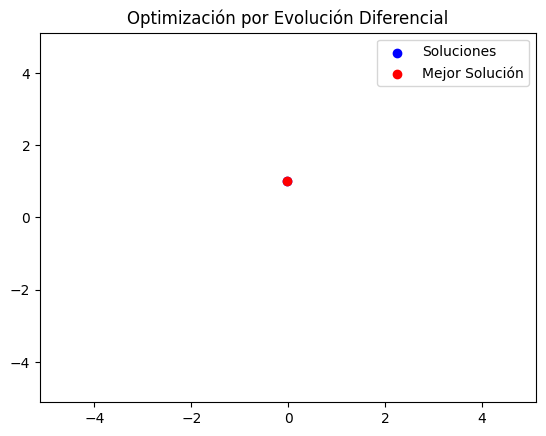

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.optimize import differential_evolution

# Definir los l√≠mites de b√∫squeda
bounds = [(-5.12, 5.12)] * 2  # Para 2D

# Crear una figura para la visualizaci√≥n
fig, ax = plt.subplots()
ax.set_xlim(-5.12, 5.12)
ax.set_ylim(-5.12, 5.12)
ax.set_title("Optimizaci√≥n por Evoluci√≥n Diferencial - Evoluci√≥n de la soluci√≥n")

# Almacenar las soluciones en cada iteraci√≥n
solutions = []

# Funci√≥n de callback para almacenar las soluciones durante la optimizaci√≥n
def callback(xk, convergence):
    solutions.append(xk)

# Ejecutar la optimizaci√≥n con Evoluci√≥n Diferencial
result = differential_evolution(rastrigin, bounds, callback=callback)

print("Mejor soluci√≥n encontrada:", result.x)
print("Valor de la funci√≥n objetivo:", result.fun)

# Funci√≥n para actualizar el gr√°fico en cada frame de la animaci√≥n
def update_frame(i):
    ax.clear()  # Limpiar el gr√°fico
    ax.set_xlim(-5.12, 5.12)
    ax.set_ylim(-5.12, 5.12)
    ax.set_title("Optimizaci√≥n por Evoluci√≥n Diferencial")

    # Graficar las soluciones obtenidas hasta el momento
    solutions_up_to_now = np.array(solutions[:i + 1])
    ax.scatter(solutions_up_to_now[:, 0], solutions_up_to_now[:, 1], color='blue', label="Soluciones")

    # Resaltar la mejor soluci√≥n
    best_solution = np.array(solutions[i])
    if i==n_iterations-1:
        print("Mejor soluci√≥n encontrada:", best_solution)
        print("Valor de la funci√≥n objetivo:", rastrigin(best_solution))
    ax.scatter(best_solution[0], best_solution[1], color='red', label="Mejor Soluci√≥n")
    ax.legend()

# Crear la animaci√≥n
ani = animation.FuncAnimation(fig, update_frame, frames=len(solutions), interval=200)

# Guardar la animaci√≥n como un archivo GIF
ani.save('differential_evolution_rastrigin.gif', writer='imagemagick', fps=2)


La mejor soluci√≥n que encontr√≥ el algoritmo es el vector
[1.35755272e-09 6.82099426e-10]. Este vector es muy cercano al origen
(0,0), adem√°s, el valor de la funci√≥n en ese punto es 0.0, lo que indica que el algoritmo ha convergido a un punto que se encuentra muy pr√≥ximo al m√≠nimo global.

### Funci√≥n en 3 dimensiones

Mejor soluci√≥n encontrada: [-4.48774732e-09 -9.94958647e-01 -4.07632157e-09]
Valor de la funci√≥n objetivo: 0.9949590570933147


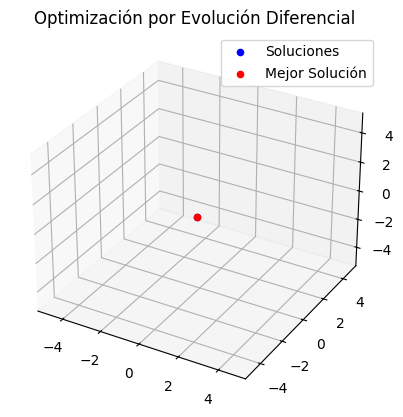

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import differential_evolution

# Definir la funci√≥n Rastrigin
def rastrigin(x):
    A = 10
    return A * len(x) + np.sum(x**2 - A * np.cos(2 * np.pi * x))

# Definir los l√≠mites de b√∫squeda para 3 dimensiones
bounds = [(-5.12, 5.12)] * 3

# Almacenar las soluciones en cada iteraci√≥n
solutions = []

# Funci√≥n de callback para almacenar las soluciones durante la optimizaci√≥n
def callback(xk, convergence):
    solutions.append(xk)

# Ejecutar la optimizaci√≥n con Evoluci√≥n Diferencial
result = differential_evolution(rastrigin, bounds, callback=callback)

print("Mejor soluci√≥n encontrada:", result.x)
print("Valor de la funci√≥n objetivo:", result.fun)

# Crear una figura para la visualizaci√≥n 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-5.12, 5.12)
ax.set_ylim(-5.12, 5.12)
ax.set_zlim(-5.12, 5.12)
ax.set_title("Optimizaci√≥n por Evoluci√≥n Diferencial - Evoluci√≥n de la soluci√≥n en 3D")

# Funci√≥n para actualizar el gr√°fico en cada frame de la animaci√≥n
def update_frame(i):
    ax.clear()  # Limpiar el gr√°fico
    ax.set_xlim(-5.12, 5.12)
    ax.set_ylim(-5.12, 5.12)
    ax.set_zlim(-5.12, 5.12)
    ax.set_title("Optimizaci√≥n por Evoluci√≥n Diferencial")

    # Graficar las soluciones obtenidas hasta el momento
    solutions_up_to_now = np.array(solutions[:i + 1])
    ax.scatter(solutions_up_to_now[:, 0], solutions_up_to_now[:, 1], solutions_up_to_now[:, 2],
               color='blue', label="Soluciones")

    # Resaltar la mejor soluci√≥n
    if len(solutions) > 0:
        best_solution = np.array(solutions[i])
        ax.scatter(best_solution[0], best_solution[1], best_solution[2], color='red', label="Mejor Soluci√≥n")
    ax.legend()

# Crear la animaci√≥n
ani = animation.FuncAnimation(fig, update_frame, frames=len(solutions), interval=200)

# Guardar la animaci√≥n como un archivo GIF
ani.save('differential_evolution_rastrigin_3D.gif', writer='pillow', fps=2)


La mejor soluci√≥n que encontr√≥ el algoritmo es el vector
[-4.48774732e-09 -9.94958647e-01 -4.07632157e-09]. Este vector es muy cercano al origen
(0,0,0),adem√°s el valor de la funci√≥n es 0.0, lo que indica que el algoritmo ha convergido a un punto que se encuentra muy pr√≥ximo al m√≠nimo global.

### **Conclusion**

La Evoluci√≥n Diferencial es un algoritmo de optimizaci√≥n global que utiliza una poblaci√≥n de posibles soluciones (vectores) y las mejora mediante combinaciones aleatorias y mutaciones.
En este caso, el algoritmo ha encontrado una soluci√≥n tan cercana al m√≠nimo global que las diferencias son pr√°cticamente insignificantes
$10^{‚àí9}$, lo cual es un resultado excelente, mostrando la efectividad del algoritmo para este problema.
El hecho de que el valor de la funci√≥n objetivo sea 0.0 confirma que el algoritmo ha logrado minimizar la funci√≥n completamente.

# Funci√≥n Rosenbrock

La funci√≥n de Rosenbrock es una funci√≥n no convexa definida como:
$$
f(\mathbf{X}) = f(x_1,x_2,...,x_n)= \sum_{i=1}^{n-1}  [100 (x_{i+1} - x_{i}^2)^2 + (1-x_{i})^2]
$$
Tiene un minimo global en $(x,y)=f(x,y)$ donde $f(x,y)=0$ , Por lo general, estos par√°metros se establecen de tal manera que $a=1 , b=100$
.

## Optimizaci√≥n mediante descenso por gradiente

El gradiente de
ùëì(ùë•) es un vector que contiene las derivadas parciales de ùëì con respecto a cada $x_i$ Donde:

$
\frac{‚àÇf}{‚àÇx_i}
‚Äã
 =‚àí400x_i(x_{i+1}‚àíx_i^2)‚àí2(1‚àíx_i)+200(x_i‚àíx_{i‚àí1}^2)
$

### Funci√≥n en 2 dimensiones

Punto √≥ptimo encontrado (x, y): [0.99999546 0.99999091]
Valor de la funci√≥n en el punto √≥ptimo: 2.059824449751566e-11


<ipython-input-34-e1d2756743c2>:48: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  punto_actual.set_data(puntos_iteracion[i][0], puntos_iteracion[i][1])
<ipython-input-34-e1d2756743c2>:48: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  punto_actual.set_data(puntos_iteracion[i][0], puntos_iteracion[i][1])
<ipython-input-34-e1d2756743c2>:50: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  punto_optimizado.set_data(puntos_iteracion[i][0], puntos_iteracion[i][1])


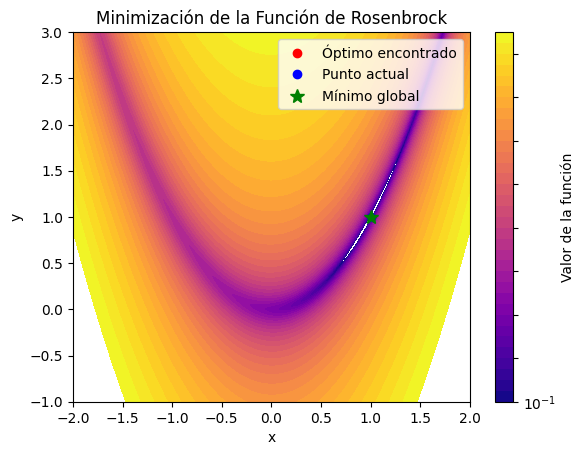

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.optimize import minimize
from matplotlib.animation import FuncAnimation, PillowWriter
np.random.seed(42)

# Definici√≥n de la funci√≥n de Rosenbrock en 2D
def rosenbrock(x):
    a, b = 1, 100
    return (a - x[0])**2 + b * (x[1] - x[0]**2)**2

# Punto inicial aleatorio
x0 = np.random.uniform(-2, 2, 2)

# Lista para almacenar los puntos de la iteraci√≥n
puntos_iteracion = [x0]

# Funci√≥n de callback para almacenar los puntos de la iteraci√≥n
def callback(xk):
    puntos_iteracion.append(xk)

# Minimizaci√≥n de la funci√≥n usando descenso por gradiente
result = minimize(rosenbrock, x0, method='BFGS', callback=callback)

# Visualizaci√≥n de la funci√≥n de Rosenbrock en el espacio
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = (1 - X)**2 + 100 * (Y - X**2)**2

fig, ax = plt.subplots()
contour = ax.contourf(X, Y, Z, levels=np.logspace(-1, 3, 35), cmap='plasma', norm=LogNorm())
plt.colorbar(contour, label='Valor de la funci√≥n')

punto_optimizado, = ax.plot([], [], 'ro', label="√ìptimo encontrado")
punto_actual, = ax.plot([], [], 'bo', label="Punto actual")
ax.plot(1, 1, 'g*', markersize=10, label="M√≠nimo global")
ax.legend()
ax.set_title("Minimizaci√≥n de la Funci√≥n de Rosenbrock")
ax.set_xlabel("x")
ax.set_ylabel("y")

print("Punto √≥ptimo encontrado (x, y):", result.x)
print("Valor de la funci√≥n en el punto √≥ptimo:", result.fun)

def animate(i):
    punto_actual.set_data(puntos_iteracion[i][0], puntos_iteracion[i][1])
    if i == len(puntos_iteracion) - 1:
        punto_optimizado.set_data(puntos_iteracion[i][0], puntos_iteracion[i][1])
    return punto_actual, punto_optimizado

ani = FuncAnimation(fig, animate, frames=len(puntos_iteracion), interval=100, blit=True, repeat=True)
ani.save("evolucion_funcion.gif", writer=PillowWriter(fps=20))

plt.show()

Se puede apreciar que mediante √©ste m√©todo se encuentra el m√≠nimo de la funci√≥n de manera suave y sin problemas,pues al presentar un √∫nico m√≠nimo,el algoritmo avanza hasta encontrar el valor √≥ptimo, en √©ste caso convergiendo a:$(x, y): [0.99999546, 0.99999091]$ donde la funci√≥n toma el valor de $2.059824449751566e-11$.

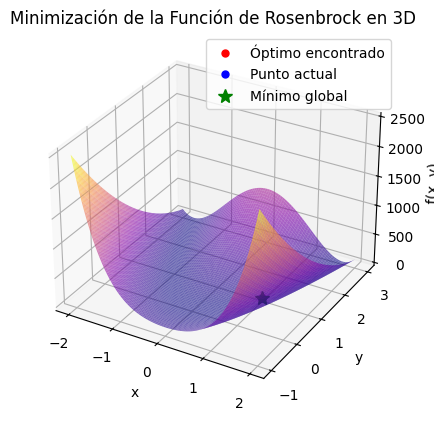

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# Funci√≥n de callback para almacenar los puntos de la iteraci√≥n
def callback(xk):
    puntos_iteracion.append(xk)

# Minimizaci√≥n de la funci√≥n usando descenso por gradiente
result = minimize(rosenbrock, x0, method='BFGS', callback=callback)

# Visualizaci√≥n de la funci√≥n de Rosenbrock en 3D
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = (1 - X)**2 + 100 * (Y - X**2)**2

# Configuraci√≥n de la figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=5, cstride=5, alpha=0.6, cmap='plasma')
ax.set_title("Minimizaci√≥n de la Funci√≥n de Rosenbrock en 3D")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")

# Plot para el punto optimizado y el punto actual
punto_optimizado, = ax.plot([], [], [], 'ro', markersize=5, label="√ìptimo encontrado")
punto_actual, = ax.plot([], [], [], 'bo', markersize=5, label="Punto actual")
ax.plot([1], [1], [0], 'g*', markersize=10, label="M√≠nimo global")  # M√≠nimo global conocido
ax.legend()

# Funci√≥n de animaci√≥n
def animate(i):
    x, y = puntos_iteracion[i]
    z = rosenbrock([x, y])
    punto_actual.set_data([x], [y])
    punto_actual.set_3d_properties([z])
    if i == len(puntos_iteracion) - 1:
        punto_optimizado.set_data([x], [y])
        punto_optimizado.set_3d_properties([z])
    return punto_actual, punto_optimizado

# Creaci√≥n de la animaci√≥n
ani = FuncAnimation(fig, animate, frames=len(puntos_iteracion), interval=100, blit=True, repeat=True)
ani.save("evolucion_funcion_3d.gif", writer=PillowWriter(fps=20))

plt.show()


### Funci√≥n en 3 variables

Punto √≥ptimo encontrado (x, y): [0.99999732 0.99999464 0.99998926]
Valor de la funci√≥n en el punto √≥ptimo: 3.595153630352267e-11


<ipython-input-3-c8c05cd3f942>:52: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  punto_xy.set_data(x, y)
<ipython-input-3-c8c05cd3f942>:53: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  punto_xz.set_data(x, z)
<ipython-input-3-c8c05cd3f942>:54: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  punto_yz.set_data(y, z)
<ipython-input-3-c8c05cd3f942>:52: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  punto_xy.set_data(x, y)
<ipython-input-3-c8c05cd3f942>:53: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  punto_xz.set_data(x, z)
<ipython-input-

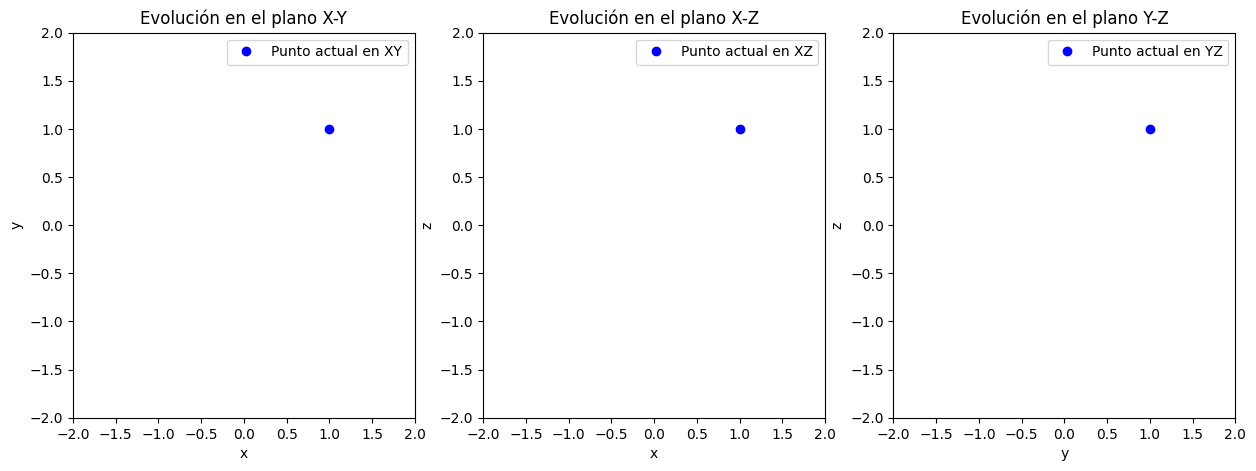

In [ ]:
# Definici√≥n de la funci√≥n de Rosenbrock en 3D (tres variables)
def rosenbrock_3d(x):
    a, b = 1, 100
    return (a - x[0])**2 + b * (x[1] - x[0]**2)**2 + (a - x[1])**2 + b * (x[2] - x[1]**2)**2

# Punto inicial aleatorio
x0 = np.random.uniform(-2, 2, 3)

# Lista para almacenar los puntos de la iteraci√≥n
puntos_iteracion = [x0]

# Funci√≥n de callback para almacenar los puntos de la iteraci√≥n
def callback(xk):
    puntos_iteracion.append(xk)

# Minimizaci√≥n de la funci√≥n usando descenso por gradiente
result = minimize(rosenbrock_3d, x0, method='BFGS', callback=callback)

# Configuraci√≥n de la figura para las proyecciones parciales
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].set_title("Evoluci√≥n en el plano X-Y")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")

axs[1].set_title("Evoluci√≥n en el plano X-Z")
axs[1].set_xlabel("x")
axs[1].set_ylabel("z")

axs[2].set_title("Evoluci√≥n en el plano Y-Z")
axs[2].set_xlabel("y")
axs[2].set_ylabel("z")

# L√≠neas para los puntos actuales en cada proyecci√≥n
punto_xy, = axs[0].plot([], [], 'bo', label="Punto actual en XY")
punto_xz, = axs[1].plot([], [], 'bo', label="Punto actual en XZ")
punto_yz, = axs[2].plot([], [], 'bo', label="Punto actual en YZ")

# Muestra el punto √≥ptimo encontrado
print("Punto √≥ptimo encontrado (x, y):", result.x)
print("Valor de la funci√≥n en el punto √≥ptimo:", result.fun)


# Definimos los l√≠mites de los gr√°ficos
for ax in axs:
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.legend()

# Funci√≥n de animaci√≥n para actualizar los puntos en cada fotograma
def animate(i):
    x, y, z = puntos_iteracion[i]
    punto_xy.set_data(x, y)
    punto_xz.set_data(x, z)
    punto_yz.set_data(y, z)
    return punto_xy, punto_xz, punto_yz

# Creaci√≥n de la animaci√≥n
ani = FuncAnimation(fig, animate, frames=len(puntos_iteracion), interval=100, blit=True, repeat=True)
ani.save("evolucion_funcion_3d_proyeccion.gif", writer=PillowWriter(fps=20))

plt.show()


De la misma forma que el descenso por gradiente funcion√≥ bien para 2 dimensiones, tambi√©n lo hace en 3, y en general funcionar√° bien para N dimensiones al trabajar con la funci√≥n de rosenbrock pues su n√∫mero de minimos siempre ser√° 1 y ser√° el global.

En este caso el algoritmo convergi√≥ a las coordenadas $(x, y): [0.99999729, 0.99999455, 0.99998909]$ con
Valor de la funci√≥n en el punto √≥ptimo de $3.7114425074216464e-11$

## Optimizaci√≥n mediante Algoritmo Gen√©tico

In [ ]:
# Algoritmo gen√©tico
def genetic_algorithm(func, dim, population_size=50, generations=100):
    # Inicializar la poblaci√≥n
    population = np.random.uniform(-2, 2, (population_size, dim))
    fitness = np.array([func(ind) for ind in population])

    # Registrar el mejor punto en cada generaci√≥n
    history = [population[np.argmin(fitness)]]

    for _ in range(generations):
        # Selecci√≥n de los mejores padres
        parents = population[np.argsort(fitness)[:population_size // 2]]

        # Reproducci√≥n (cruce y mutaci√≥n)
        offspring = []
        for _ in range(population_size // 2):
            parent1 = parents[np.random.randint(0, len(parents))]
            parent2 = parents[np.random.randint(0, len(parents))]
            child = (parent1 + parent2) / 2 + np.random.normal(0, 0.1, dim)
            offspring.append(child)

        # Crear la nueva poblaci√≥n
        population = np.concatenate((parents, offspring))
        fitness = np.array([func(ind) for ind in population])

        # Registrar el mejor punto actual
        best_individual = population[np.argmin(fitness)]
        history.append(best_individual)

    return history


### Funci√≥n en 2 dimensiones

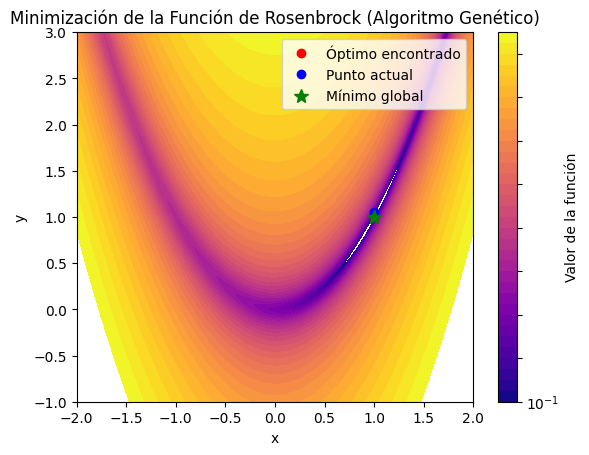

In [ ]:
# Ejecutar el algoritmo gen√©tico
puntos_iteracion = genetic_algorithm(rosenbrock, 2, population_size=50, generations=100)

# Visualizaci√≥n de la funci√≥n de Rosenbrock en el espacio
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = (1 - X)**2 + 100 * (Y - X**2)**2

fig, ax = plt.subplots()
contour = ax.contourf(X, Y, Z, levels=np.logspace(-1, 3, 35), cmap='plasma', norm=LogNorm())
plt.colorbar(contour, label='Valor de la funci√≥n')

punto_optimizado, = ax.plot([], [], 'ro', label="√ìptimo encontrado")
punto_actual, = ax.plot([], [], 'bo', label="Punto actual")
ax.plot(1, 1, 'g*', markersize=10, label="M√≠nimo global")
ax.legend()
ax.set_title("Minimizaci√≥n de la Funci√≥n de Rosenbrock (Algoritmo Gen√©tico)")
ax.set_xlabel("x")
ax.set_ylabel("y")


def animate(i):
    punto_actual.set_data(puntos_iteracion[i][0], puntos_iteracion[i][1])
    if i == len(puntos_iteracion) - 1:
        punto_optimizado.set_data(puntos_iteracion[i][0], puntos_iteracion[i][1])
    return punto_actual, punto_optimizado

ani = FuncAnimation(fig, animate, frames=len(puntos_iteracion), interval=100, blit=True, repeat=True)
ani.save("evolucion_funcion_genetico.gif", writer=PillowWriter(fps=20))

plt.show()


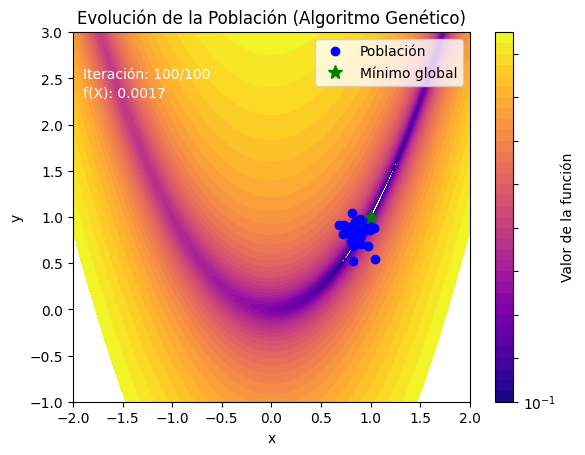

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.animation import FuncAnimation, PillowWriter
np.random.seed(42)

# Definici√≥n de la funci√≥n de Rosenbrock en 2D
def rosenbrock(x):
    a, b = 1, 100
    return (a - x[0])**2 + b * (x[1] - x[0]**2)**2

# Algoritmo gen√©tico modificado
def genetic_algorithm(func, dim, population_size, generations):
    population = np.random.uniform(-2, 2, (population_size, dim))
    history = []  # Almacenar todas las poblaciones

    for generation in range(generations):
        fitness = np.array([func(ind) for ind in population])
        history.append(population.copy())  # Guardar la poblaci√≥n actual

        # Selecci√≥n: los mejores sobreviven
        selected = population[np.argsort(fitness)[:population_size // 2]]

        # Reproducci√≥n
        offspring = []
        for _ in range(population_size // 2):
            parent1, parent2 = selected[np.random.choice(len(selected), 2, replace=False)]
            child = (parent1 + parent2) / 2 + np.random.normal(0, 0.1, dim)
            offspring.append(child)

        # Nueva poblaci√≥n: sobrevivientes + descendencia
        population = np.vstack((selected, offspring))

    return history

# Ejecutar el algoritmo gen√©tico
puntos_iteracion = genetic_algorithm(rosenbrock, dim=2, population_size=50, generations=100)

# Visualizaci√≥n de la funci√≥n de Rosenbrock
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = (1 - X)**2 + 100 * (Y - X**2)**2

fig, ax = plt.subplots()
contour = ax.contourf(X, Y, Z, levels=np.logspace(-1, 3, 35), cmap='plasma', norm=LogNorm())
plt.colorbar(contour, label='Valor de la funci√≥n')

# Configuraci√≥n inicial para animaci√≥n
poblacion_puntos, = ax.plot([], [], 'bo', label="Poblaci√≥n")
punto_optimo_global, = ax.plot(1, 1, 'g*', markersize=10, label="M√≠nimo global")
ax.legend()
ax.set_title("Evoluci√≥n de la Poblaci√≥n (Algoritmo Gen√©tico)")
ax.set_xlabel("x")
ax.set_ylabel("y")

# Texto para mostrar la iteraci√≥n y el valor de f(X)
iteracion_text = ax.text(-1.9, 2.5, "", fontsize=10, color='white')
f_x_text = ax.text(-1.9, 2.3, "", fontsize=10, color='white')

# Funci√≥n para actualizar cada cuadro de la animaci√≥n
def animate(i):
    poblacion = puntos_iteracion[i]
    poblacion_puntos.set_data(poblacion[:, 0], poblacion[:, 1])

    # Calcular el valor de f(X) para la mejor soluci√≥n de esta iteraci√≥n
    fitness = np.array([rosenbrock(ind) for ind in poblacion])
    mejor_individuo = poblacion[np.argmin(fitness)]
    f_x_optimo = np.min(fitness)

    # Actualizar los textos de la iteraci√≥n y el valor de f(X)
    iteracion_text.set_text(f"Iteraci√≥n: {i+1}/{len(puntos_iteracion)}")
    f_x_text.set_text(f"f(X): {f_x_optimo:.4f}")

    return poblacion_puntos, iteracion_text, f_x_text

# Crear la animaci√≥n
ani = FuncAnimation(fig, animate, frames=len(puntos_iteracion), interval=100, blit=True, repeat=True)

# Guardar como GIF
ani.save("evolucion_poblacion_genetico.gif", writer=PillowWriter(fps=20))

plt.show()


In [ ]:
# √öltima poblaci√≥n generada por el algoritmo gen√©tico
ultima_poblacion = puntos_iteracion[-1]

# Encontrar el punto √≥ptimo en la √∫ltima poblaci√≥n
punto_optimo = min(ultima_poblacion, key=rosenbrock)
valor_optimo = rosenbrock(punto_optimo)

# Mostrar los resultados
print(f"El punto √≥ptimo encontrado es: {punto_optimo}")
print(f"El valor de la funci√≥n en el √≥ptimo es: {valor_optimo}")

El punto √≥ptimo encontrado es: [0.95928733 0.9198395 ]
El valor de la funci√≥n en el √≥ptimo es: 0.0016729419474617686


### Funci√≥n en 3 dimensiones

<ipython-input-56-7c0a7e9dbfcf>:84: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  punto_optimizado.set_data(mejor[0], mejor[1])


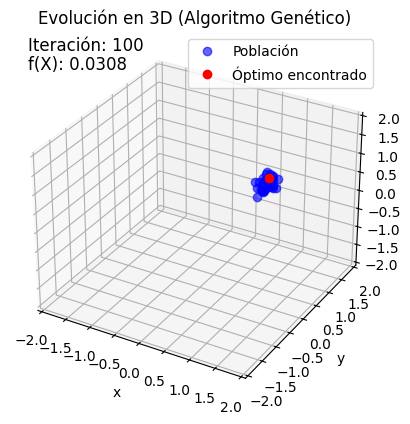

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter
np.random.seed(42)

# Funci√≥n de Rosenbrock en 3D
def rosenbrock_3d(x):
    a = 1
    b = 100
    return sum((a - x[:-1])**2 + b * (x[1:] - x[:-1]**2)**2)

# Algoritmo gen√©tico para 3 variables
def genetic_algorithm(func, dimension, population_size=50, generations=100, mutation_rate=0.1):
    population = np.random.uniform(-2, 2, (population_size, dimension))
    history = [population]

    for _ in range(generations):
        # Evaluar aptitud (fitness)
        fitness = np.array([func(ind) for ind in population])
        sorted_indices = np.argsort(fitness)
        population = population[sorted_indices]

        # Selecci√≥n (elitismo + torneo)
        elite = population[:5]
        parents = population[:population_size // 2]

        # Cruce (recombinaci√≥n)
        offspring = []
        for _ in range(population_size - len(elite)):
            p1, p2 = parents[np.random.randint(0, len(parents), 2)]
            crossover_point = np.random.randint(1, dimension)
            child = np.concatenate((p1[:crossover_point], p2[crossover_point:]))
            offspring.append(child)
        offspring = np.array(offspring)

        # Mutaci√≥n
        mutation = np.random.uniform(-1, 1, offspring.shape) * mutation_rate
        offspring += mutation

        # Actualizar poblaci√≥n
        population = np.vstack((elite, offspring))
        history.append(population)

    return history

# Ejecutar el algoritmo gen√©tico
puntos_iteracion = genetic_algorithm(rosenbrock_3d, 3, population_size=50, generations=100)

# Crear la figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Evoluci√≥n en 3D (Algoritmo Gen√©tico)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Configurar l√≠mites del espacio de b√∫squeda
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)

# Inicializaci√≥n de los puntos
puntos, = ax.plot([], [], [], 'bo', label="Poblaci√≥n", alpha=0.6)
punto_optimizado, = ax.plot([], [], [], 'ro', label="√ìptimo encontrado")
iteracion_text = ax.text2D(0.05, 0.95, "", transform=ax.transAxes, fontsize=12, color='black')
valor_text = ax.text2D(0.05, 0.90, "", transform=ax.transAxes, fontsize=12, color='black')

ax.legend()

# Animaci√≥n
def animate(i):
    poblacion = puntos_iteracion[i]
    puntos.set_data(poblacion[:, 0], poblacion[:, 1])
    puntos.set_3d_properties(poblacion[:, 2])

    # Mostrar la iteraci√≥n y el valor de la funci√≥n en ese momento
    iteracion_text.set_text(f"Iteraci√≥n: {i}")
    mejor_individuo = min(poblacion, key=rosenbrock_3d)
    valor_text.set_text(f"f(X): {rosenbrock_3d(mejor_individuo):.4f}")

    if i == len(puntos_iteracion) - 1:
        mejor = min(poblacion, key=rosenbrock_3d)
        punto_optimizado.set_data(mejor[0], mejor[1])
        punto_optimizado.set_3d_properties(mejor[2])

    return puntos, punto_optimizado, iteracion_text, valor_text

ani = FuncAnimation(fig, animate, frames=len(puntos_iteracion), interval=100, blit=True, repeat=True)
ani.save("evolucion_3d_genetico_con_textos.gif", writer=PillowWriter(fps=20))

plt.show()


In [ ]:
# Obtener la √∫ltima poblaci√≥n generada
ultima_poblacion = puntos_iteracion[-1]

# Encontrar el mejor individuo (m√≠nimo de la funci√≥n)
mejor_individuo = min(ultima_poblacion, key=rosenbrock_3d)

# Calcular el valor de la funci√≥n en ese individuo
valor_optimo = rosenbrock_3d(mejor_individuo)

# Imprimir el valor de X y f(X) √≥ptimo
print(f"El punto √≥ptimo encontrado es: X = {mejor_individuo}")
print(f"El valor de la funci√≥n en el √≥ptimo es: f(X) = {valor_optimo}")

El punto √≥ptimo encontrado es: X = [0.91890016 0.84455243 0.71404905]
El valor de la funci√≥n en el √≥ptimo es: f(X) = 0.030805069276073287


## Optimizaci√≥n por Enjambre de Part√≠culas

In [ ]:
# Algoritmo PSO
def pso(func, dim, population_size=30, generations=200, w=0.5, c1=1.5, c2=1.5):
    # Inicializaci√≥n
    positions = np.random.uniform(-5, 5, (population_size, dim))
    velocities = np.random.uniform(-1, 1, (population_size, dim))
    personal_best_positions = np.copy(positions)
    personal_best_scores = np.array([func(p) for p in positions])
    global_best_position = personal_best_positions[np.argmin(personal_best_scores)]

    history = [global_best_position]

    # Iteraciones
    for _ in range(generations):
        for i in range(population_size):
            r1, r2 = np.random.rand(dim), np.random.rand(dim)
            velocities[i] = (
                w * velocities[i]
                + c1 * r1 * (personal_best_positions[i] - positions[i])
                + c2 * r2 * (global_best_position - positions[i])
            )
            positions[i] += velocities[i]
            score = func(positions[i])

            # Actualizar mejores posiciones personales y globales
            if score < personal_best_scores[i]:
                personal_best_scores[i] = score
                personal_best_positions[i] = positions[i]

        # Actualizar el mejor global
        global_best_position = personal_best_positions[np.argmin(personal_best_scores)]
        history.append(global_best_position)

    return history

### Funci√≥n en 2 dimensiones

Mejor posici√≥n encontrada: [1.00000005 1.00000002]
Valor de la funci√≥n objetivo: 2.2737746057730575e-15


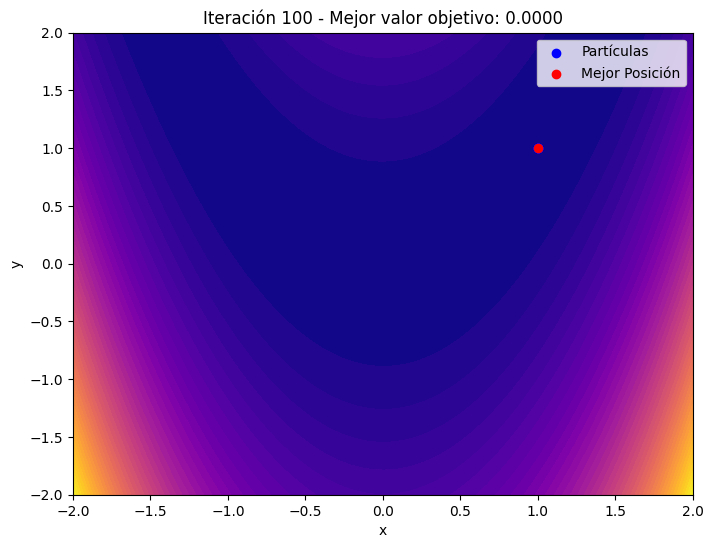

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
np.random.seed(42)
# Definir la funci√≥n de Rosenbrock
def rosenbrock(x):
    a, b = 1, 100
    return (a - x[0])**2 + b * (x[1] - x[0]**2)**2

# Definir los l√≠mites de b√∫squeda
lb = [-2] * 2  # L√≠mites inferiores para 2D
ub = [2] * 2   # L√≠mites superiores para 2D

# N√∫mero de part√≠culas y n√∫mero m√°ximo de iteraciones
n_particles = 50
n_iterations = 100

# Inicializar las posiciones y velocidades de las part√≠culas
positions = np.random.uniform(lb, ub, (n_particles, 2))  # Posiciones iniciales de las part√≠culas
velocities = np.random.uniform(-0.5, 0.5, (n_particles, 2))  # Velocidades iniciales de las part√≠culas

# Crear el gr√°fico de la funci√≥n de Rosenbrock
x = np.linspace(lb[0], ub[0], 400)
y = np.linspace(lb[1], ub[1], 400)
X, Y = np.meshgrid(x, y)
Z = (1 - X)**2 + 100 * (Y - X**2)**2

# Funci√≥n para actualizar el gr√°fico
fig, ax = plt.subplots(figsize=(8, 6))
ax.contourf(X, Y, Z, levels=50, cmap="plasma")  # Contorno de la funci√≥n
ax.set_xlim(lb[0], ub[0])
ax.set_ylim(lb[1], ub[1])
ax.set_title("Optimizaci√≥n PSO - Evoluci√≥n de Part√≠culas")
ax.set_xlabel("x")
ax.set_ylabel("y")

# Almacenar las posiciones de las part√≠culas durante las iteraciones
particle_positions = []

# Inicializar elementos del gr√°fico
particles_scatter = ax.scatter([], [], color='blue', label="Part√≠culas")
best_scatter = ax.scatter([], [], color='red', label="Mejor Posici√≥n")
ax.legend()

# Funci√≥n para actualizar los cuadros de la animaci√≥n
def update_frame(i):
    global positions, velocities
    ax.set_title(f"Iteraci√≥n {i+1} - Optimizaci√≥n PSO")

    # Evaluar la funci√≥n de Rosenbrock para todas las part√≠culas
    fitness_values = np.apply_along_axis(rosenbrock, 1, positions)

    # Encontrar el mejor valor y la mejor posici√≥n
    best_pos = positions[np.argmin(fitness_values)]
    best_value = np.min(fitness_values)

    # Actualizar el gr√°fico
    particles_scatter.set_offsets(positions)
    best_scatter.set_offsets([best_pos])

    # Actualizar texto en la gr√°fica
    ax.set_title(f"Iteraci√≥n {i+1} - Mejor valor objetivo: {best_value:.4f}")

    # Actualizar las part√≠culas (algoritmo PSO)
    w = 0.5  # Factor de inercia
    c1 = 1.5  # Coeficiente cognitivo
    c2 = 1.5  # Coeficiente social

    r1 = np.random.rand(n_particles, 2)
    r2 = np.random.rand(n_particles, 2)

    # Actualizaci√≥n de las velocidades
    velocities[:] = (
        w * velocities
        + c1 * r1 * (best_pos - positions)
        + c2 * r2 * (best_pos - positions)
    )

    # Actualizaci√≥n de las posiciones
    positions[:] = positions + velocities

    # Almacenar las posiciones para la animaci√≥n
    particle_positions.append(positions.copy())

    # En la √∫ltima iteraci√≥n, imprimir resultados
    if i == n_iterations - 1:
        print("Mejor posici√≥n encontrada:", best_pos)
        print("Valor de la funci√≥n objetivo:", best_value)

# Crear la animaci√≥n
ani = animation.FuncAnimation(fig, update_frame, frames=n_iterations, interval=200, repeat=False)

# Guardar la animaci√≥n como un archivo GIF
ani.save('pso_rosenbrock_2d.gif', writer='pillow', fps=5)

plt.show()


Funci√≥n en 3 dimensiones

Mejor posici√≥n encontrada: [0.99998526 0.99996815 0.99994188]
Valor de la funci√≥n objetivo: 5.692284283128508e-09


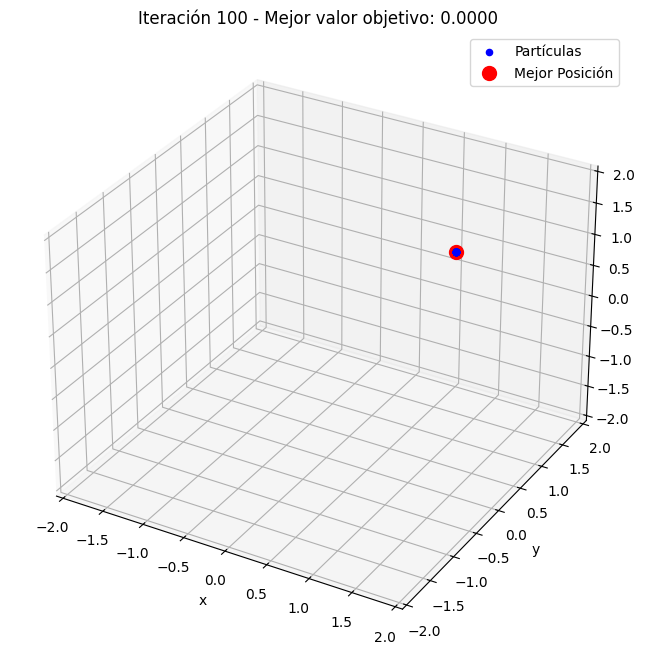

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
np.random.seed(42)

# Definir la funci√≥n de Rosenbrock
def rosenbrock(x):
    a, b = 1, 100
    return (a - x[0])**2 + b * (x[1] - x[0]**2)**2 + (a - x[2])**2 + b * (x[2] - x[1]**2)**2

# Definir los l√≠mites de b√∫squeda
lb = [-2] * 3  # L√≠mites inferiores para 3D
ub = [2] * 3   # L√≠mites superiores para 3D

# N√∫mero de part√≠culas y n√∫mero m√°ximo de iteraciones
n_particles = 50
n_iterations = 100

# Inicializar las posiciones y velocidades de las part√≠culas
positions = np.random.uniform(lb, ub, (n_particles, 3))  # Posiciones iniciales de las part√≠culas
velocities = np.random.uniform(-0.5, 0.5, (n_particles, 3))  # Velocidades iniciales de las part√≠culas

# Crear el gr√°fico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(lb[0], ub[0])
ax.set_ylim(lb[1], ub[1])
ax.set_zlim(lb[2], ub[2])
ax.set_title("Optimizaci√≥n PSO - Evoluci√≥n de Part√≠culas (3D)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Inicializar elementos del gr√°fico
particles_scatter = ax.scatter([], [], [], color='blue', label="Part√≠culas")
best_scatter = ax.scatter([], [], [], color='red', label="Mejor Posici√≥n")
ax.legend()

# Almacenar las posiciones de las part√≠culas durante las iteraciones
particle_positions = []

# Funci√≥n para actualizar los cuadros de la animaci√≥n
def update_frame(i):
    global positions, velocities
    ax.clear()
    ax.set_xlim(lb[0], ub[0])
    ax.set_ylim(lb[1], ub[1])
    ax.set_zlim(lb[2], ub[2])
    ax.set_title(f"Iteraci√≥n {i+1} - Optimizaci√≥n PSO")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")

    # Evaluar la funci√≥n de Rosenbrock para todas las part√≠culas
    fitness_values = np.apply_along_axis(rosenbrock, 1, positions)

    # Encontrar el mejor valor y la mejor posici√≥n
    best_pos = positions[np.argmin(fitness_values)]
    best_value = np.min(fitness_values)

    # Actualizar el gr√°fico
    ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], color='blue', label="Part√≠culas")
    ax.scatter(best_pos[0], best_pos[1], best_pos[2], color='red', s=100, label="Mejor Posici√≥n")
    ax.legend()

    # Mostrar el mejor valor en el t√≠tulo
    ax.set_title(f"Iteraci√≥n {i+1} - Mejor valor objetivo: {best_value:.4f}")

    # Actualizar las part√≠culas (algoritmo PSO)
    w = 0.5  # Factor de inercia
    c1 = 1.5  # Coeficiente cognitivo
    c2 = 1.5  # Coeficiente social

    r1 = np.random.rand(n_particles, 3)
    r2 = np.random.rand(n_particles, 3)

    # Actualizaci√≥n de las velocidades
    velocities[:] = (
        w * velocities
        + c1 * r1 * (best_pos - positions)
        + c2 * r2 * (best_pos - positions)
    )

    # Actualizaci√≥n de las posiciones
    positions[:] = positions + velocities

    # Almacenar las posiciones para la animaci√≥n
    particle_positions.append(positions.copy())

    # En la √∫ltima iteraci√≥n, imprimir resultados
    if i == n_iterations - 1:
        print("Mejor posici√≥n encontrada:", best_pos)
        print("Valor de la funci√≥n objetivo:", best_value)

# Crear la animaci√≥n
ani = animation.FuncAnimation(fig, update_frame, frames=n_iterations, interval=200, repeat=False)

# Guardar la animaci√≥n como un archivo GIF
ani.save('pso_rosenbrock_3d.gif', writer='pillow', fps=5)

plt.show()


## Optimizaci√≥n por Evoluci√≥n Diferencial

In [ ]:
# Implementaci√≥n de Evoluci√≥n Diferencial
def differential_evolution(func, dim, population_size=30, generations=100, F=0.8, CR=0.7):
    # Inicializaci√≥n aleatoria de la poblaci√≥n
    population = np.random.uniform(-2, 2, (population_size, dim))
    fitness = np.array([func(ind) for ind in population])
    history = [population.copy()]

    for _ in range(generations):
        new_population = population.copy()
        for i in range(population_size):
            # Selecci√≥n de tres individuos aleatorios distintos
            indices = np.random.choice(np.delete(np.arange(population_size), i), 3, replace=False)
            x1, x2, x3 = population[indices]

            # Mutaci√≥n: Generar vector mutante
            mutant = x1 + F * (x2 - x3)

            # Recombinar: Cruzar con el individuo actual
            trial = np.copy(population[i])
            crossover = np.random.rand(dim) < CR
            trial[crossover] = mutant[crossover]

            # Selecci√≥n: Reemplazar si mejora el fitness
            trial_fitness = func(trial)
            if trial_fitness < fitness[i]:
                new_population[i] = trial
                fitness[i] = trial_fitness

        population = new_population
        history.append(population.copy())

    best_idx = np.argmin(fitness)
    best_solution = population[best_idx]
    return best_solution, history

### Funci√≥n en 2 dimensiones

IndexError: list index out of range

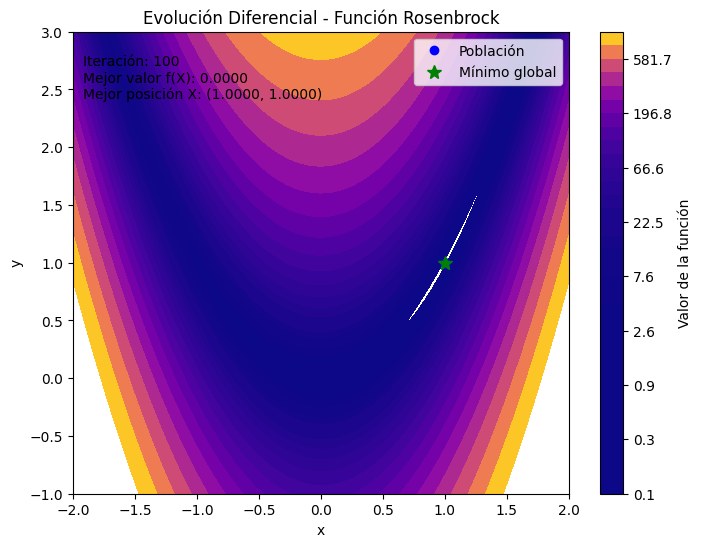

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Funci√≥n de Rosenbrock en 2D
def rosenbrock(x):
    a, b = 1, 100
    return (a - x[0])**2 + b * (x[1] - x[0]**2)**2

# Implementaci√≥n de Evoluci√≥n Diferencial
def differential_evolution(func, bounds, population_size, generations, F=0.8, CR=0.9):
    dim = len(bounds)
    population = np.random.uniform(
        [b[0] for b in bounds], [b[1] for b in bounds], (population_size, dim)
    )
    history = [population.copy()]  # Almacenar las poblaciones en cada iteraci√≥n
    best_positions = []  # Almacenar el mejor punto de cada iteraci√≥n

    # Inicializar con el mejor punto de la poblaci√≥n inicial
    best_pos = population[np.argmin([func(ind) for ind in population])]

    for gen in range(generations):
        new_population = []
        for i in range(population_size):
            # Selecci√≥n de tres vectores aleatorios distintos a i
            indices = list(range(population_size))
            indices.remove(i)
            a, b, c = population[np.random.choice(indices, 3, replace=False)]

            # Mutaci√≥n
            mutant = a + F * (b - c)
            mutant = np.clip(mutant, [b[0] for b in bounds], [b[1] for b in bounds])  # Restringir a los l√≠mites

            # Cruce
            trial = np.where(np.random.rand(dim) < CR, mutant, population[i])

            # Selecci√≥n
            if func(trial) < func(population[i]):
                new_population.append(trial)
            else:
                new_population.append(population[i])

        population = np.array(new_population)
        history.append(population.copy())  # Guardar la poblaci√≥n actual

        # Actualizar el mejor punto si se encuentra uno nuevo
        current_best = population[np.argmin([func(ind) for ind in population])]
        if func(current_best) < func(best_pos):
            best_pos = current_best
        best_positions.append(best_pos.copy())  # Registrar el mejor punto en cada iteraci√≥n

    return history, best_positions

# Configuraci√≥n del algoritmo y l√≠mites
bounds = [(-2, 2), (-1, 3)]  # L√≠mites para x e y
population_size = 50
generations = 100

# Ejecutar Evoluci√≥n Diferencial
history, best_positions = differential_evolution(rosenbrock, bounds, population_size, generations)

# Crear una malla para la visualizaci√≥n de la funci√≥n
x = np.linspace(bounds[0][0], bounds[0][1], 400)
y = np.linspace(bounds[1][0], bounds[1][1], 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock([X, Y])

# Configuraci√≥n de la animaci√≥n
fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(X, Y, Z, levels=np.logspace(-1, 3, 35), cmap='plasma')
plt.colorbar(contour, label='Valor de la funci√≥n')
poblacion_puntos, = ax.plot([], [], 'bo', label="Poblaci√≥n")
punto_optimo_global, = ax.plot(1, 1, 'g*', markersize=10, label="M√≠nimo global")
ax.legend()
ax.set_title("Evoluci√≥n Diferencial - Funci√≥n Rosenbrock")
ax.set_xlabel("x")
ax.set_ylabel("y")

# Texto din√°mico para mostrar informaci√≥n
info_text = ax.text(
    0.02, 0.95, "", transform=ax.transAxes, fontsize=10, verticalalignment="top"
)

# Funci√≥n para actualizar cada cuadro
def animate(i):
    poblacion = history[i]
    poblacion_puntos.set_data(poblacion[:, 0], poblacion[:, 1])
    best_pos = best_positions[i]
    best_value = rosenbrock(best_pos)

    info_text.set_text(
        f"Iteraci√≥n: {i+1}\n"
        f"Mejor valor f(X): {best_value:.4f}\n"
        f"Mejor posici√≥n X: ({best_pos[0]:.4f}, {best_pos[1]:.4f})"
    )
    return poblacion_puntos, info_text

# Crear la animaci√≥n
ani = FuncAnimation(fig, animate, frames=len(history), interval=100, blit=True)

# Guardar la animaci√≥n como un archivo GIF
ani.save("differential_evolution_rosenbrock_2d_with_info.gif", writer=PillowWriter(fps=20))

plt.show()


### Funci√≥n en 3 dimensiones

IndexError: list index out of range

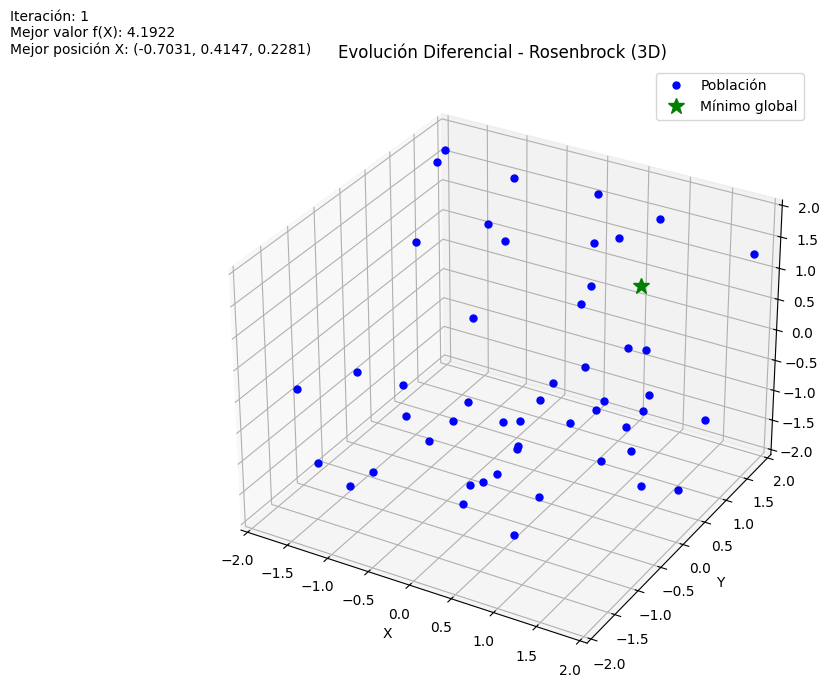

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Funci√≥n de Rosenbrock en 3D
def rosenbrock(x):
    a, b = 1, 100
    return (a - x[0])**2 + b * (x[1] - x[0]**2)**2 + (a - x[1])**2 + b * (x[2] - x[1]**2)**2

# Implementaci√≥n de Evoluci√≥n Diferencial
def differential_evolution(func, bounds, population_size, generations, F=0.8, CR=0.9):
    dim = len(bounds)
    population = np.random.uniform(
        [b[0] for b in bounds], [b[1] for b in bounds], (population_size, dim)
    )
    history = [population.copy()]  # Almacenar las poblaciones en cada iteraci√≥n
    best_positions = []  # Almacenar el mejor punto de cada iteraci√≥n

    # Inicializar con el mejor punto de la poblaci√≥n inicial
    best_pos = population[np.argmin([func(ind) for ind in population])]

    for gen in range(generations):
        new_population = []
        for i in range(population_size):
            # Selecci√≥n de tres vectores aleatorios distintos a i
            indices = list(range(population_size))
            indices.remove(i)
            a, b, c = population[np.random.choice(indices, 3, replace=False)]

            # Mutaci√≥n
            mutant = a + F * (b - c)
            mutant = np.clip(mutant, [b[0] for b in bounds], [b[1] for b in bounds])  # Restringir a los l√≠mites

            # Cruce
            trial = np.where(np.random.rand(dim) < CR, mutant, population[i])

            # Selecci√≥n
            if func(trial) < func(population[i]):
                new_population.append(trial)
            else:
                new_population.append(population[i])

        population = np.array(new_population)
        history.append(population.copy())  # Guardar la poblaci√≥n actual

        # Actualizar el mejor punto si se encuentra uno nuevo
        current_best = population[np.argmin([func(ind) for ind in population])]
        if func(current_best) < func(best_pos):
            best_pos = current_best
        best_positions.append(best_pos.copy())  # Registrar el mejor punto en cada iteraci√≥n

    return history, best_positions

# Configuraci√≥n del algoritmo y l√≠mites
bounds = [(-2, 2), (-2, 2), (-2, 2)]  # L√≠mites para x, y, z
population_size = 50
generations = 100

# Ejecutar Evoluci√≥n Diferencial
history, best_positions = differential_evolution(rosenbrock, bounds, population_size, generations)

# Configuraci√≥n de la animaci√≥n
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.set_xlim(bounds[0][0], bounds[0][1])
ax.set_ylim(bounds[1][0], bounds[1][1])
ax.set_zlim(bounds[2][0], bounds[2][1])
ax.set_title("Evoluci√≥n Diferencial - Rosenbrock (3D)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
poblacion_puntos, = ax.plot([], [], [], 'bo', label="Poblaci√≥n", markersize=5)
punto_optimo_global, = ax.plot([], [], [], 'g*', markersize=12, label="M√≠nimo global")
ax.legend()

# Texto din√°mico para mostrar informaci√≥n
info_text = plt.figtext(
    0.02, 0.95, "", fontsize=10, verticalalignment="top"
)

# Funci√≥n para actualizar cada cuadro
def animate(i):
    poblacion = history[i]
    poblacion_puntos.set_data(poblacion[:, 0], poblacion[:, 1])
    poblacion_puntos.set_3d_properties(poblacion[:, 2])
    best_pos = best_positions[i]
    best_value = rosenbrock(best_pos)

    info_text.set_text(
        f"Iteraci√≥n: {i+1}\n"
        f"Mejor valor f(X): {best_value:.4f}\n"
        f"Mejor posici√≥n X: ({best_pos[0]:.4f}, {best_pos[1]:.4f}, {best_pos[2]:.4f})"
    )
    punto_optimo_global.set_data([1], [1])
    punto_optimo_global.set_3d_properties([1])
    return poblacion_puntos, punto_optimo_global, info_text

# Crear la animaci√≥n
ani = FuncAnimation(fig, animate, frames=len(history), interval=100, blit=False)

# Guardar la animaci√≥n como un archivo GIF
ani.save("differential_evolution_rosenbrock_3d_with_info.gif", writer=PillowWriter(fps=20))

plt.show()
